In [1]:
# Unsupervised
# elbow technique - to find out K

In [2]:
url = "https://raw.githubusercontent.com/dhavalsays/py/refs/heads/master/ML/13_kmeans/income.csv"

In [3]:
import pandas as pd

income_df = pd.read_csv(url)
income_df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Notice that this data does not have a category, so it's unlabelled data. This is called Unsupervised learning, where the machine forms its own categories.

In [4]:
income_df.rename(
    columns={
        "Name": "name"
        , "Age": "age"
        , "Income($)": "income"
    },
    inplace=True,
)

In [5]:
income_df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

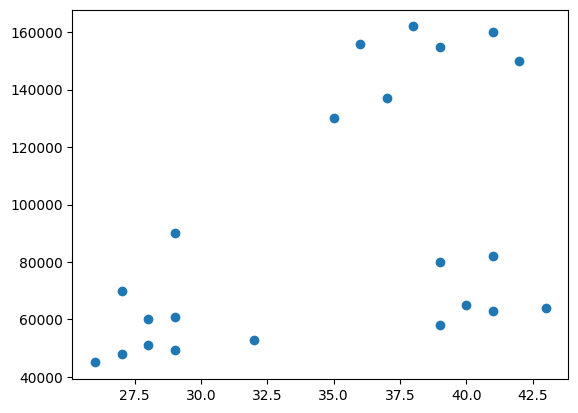

In [7]:
plt.scatter(income_df.age, income_df.income)

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income_df[["age", "income"]])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
income_df["cluster"] = y_predicted
income_df.head()

,name,age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<Axes: xlabel='age', ylabel='income'>

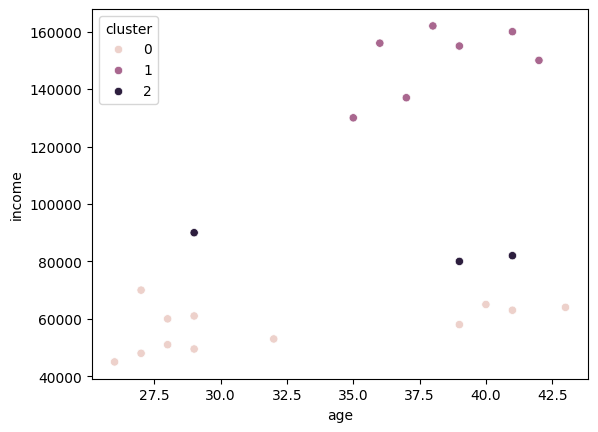

In [10]:
import seaborn as sn

sn.scatterplot(x="age", y="income", hue="cluster", data=income_df)

We can see that the classification was not done very correctly, that's because of scaling of the axes. The y-axis(income) has very high values while the age has very low.
This is where we use MinMaxScaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(income_df[["income"]])
income_df["income_s"] = scaler.transform(income_df[["income"]])

scaler.fit(income_df[["age"]])
income_df["age_s"] = scaler.transform(income_df[["age"]])

In [12]:
income_df.head()

,name,age,income,cluster,income_s,age_s
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,2,0.384615,0.176471
2,Mohan,29,61000,0,0.136752,0.176471
3,Ismail,28,60000,0,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [13]:
km_s = KMeans(n_clusters=3)
income_df['cluster_s'] = km_s.fit_predict(income_df[["age_s", "income_s"]])

<Axes: xlabel='age_s', ylabel='income_s'>

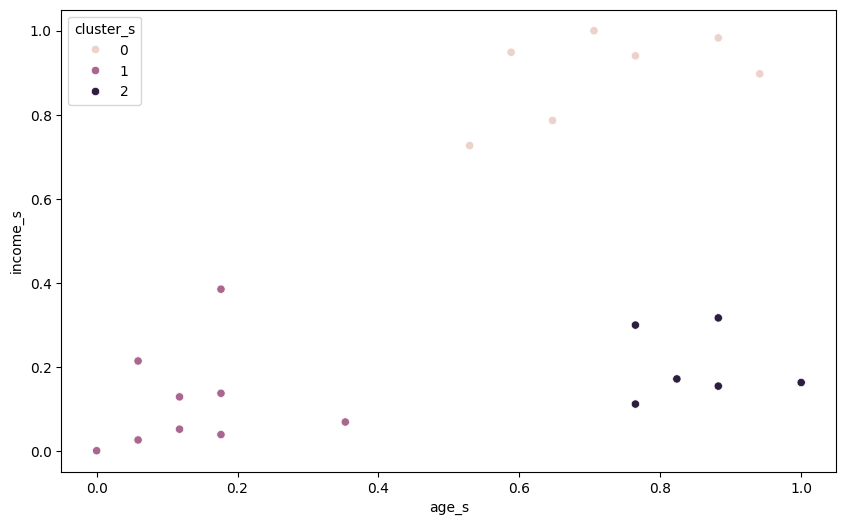

In [14]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x="age_s", y="income_s", hue="cluster_s", data=income_df)

In [15]:
print("Unscaled: ", km.cluster_centers_)
print("Scaled: ", km_s.cluster_centers_)

Unscaled:  [[3.24166667e+01 5.72916667e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.63333333e+01 8.40000000e+04]]
Scaled:  [[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


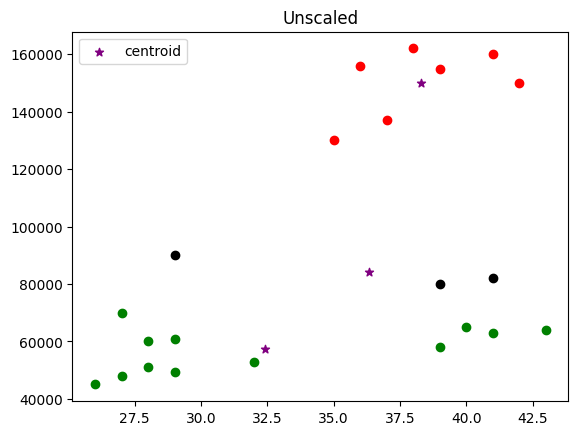

In [16]:
df0 = income_df[income_df.cluster == 0]
df1 = income_df[income_df.cluster == 1]
df2 = income_df[income_df.cluster == 2]

plt.title("Unscaled")
plt.scatter(df0.age, df0.income, color="green")
plt.scatter(df1.age, df1.income, color="red")
plt.scatter(df2.age, df2.income, color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

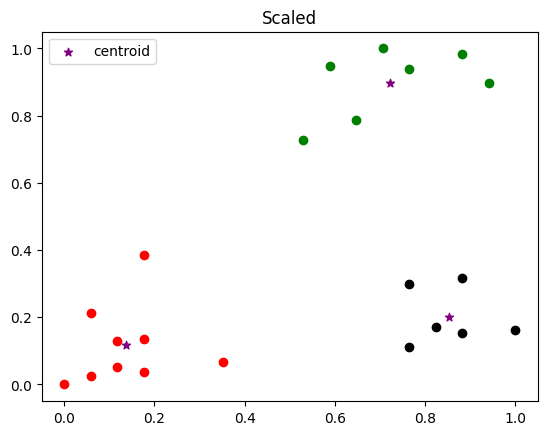

In [17]:
df0 = income_df[income_df.cluster_s == 0]
df1 = income_df[income_df.cluster_s == 1]
df2 = income_df[income_df.cluster_s == 2]

plt.title("Scaled")
plt.scatter(df0.age_s, df0.income_s, color="green")
plt.scatter(df1.age_s, df1.income_s, color="red")
plt.scatter(df2.age_s, df2.income_s, color="black")
plt.scatter(km_s.cluster_centers_[:, 0], km_s.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

# Using elbow plot

In [18]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(income_df[["age_s", "income_s"]])
    sse.append(km.inertia_)

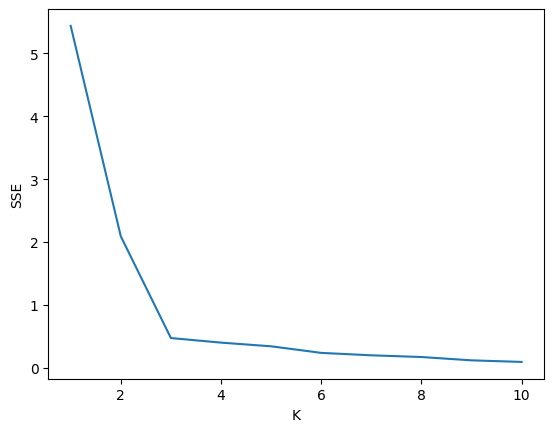

In [19]:
# choose the k with lowest sse diff, with least k's
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng, sse);

Elbow Point at k=3

# IRIS Species Detection using K-Means Clustering

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_df.rename(columns={
    "sepal length (cm)": "sepal_length"
    , "sepal width (cm)": "sepal_width"
    , "petal length (cm)": "petal_length"
    , "petal width (cm)": "petal_width"
    }, inplace=True)

In [23]:
iris_df_1 = iris_df.copy()
iris_df_1.drop(['sepal_length', 'sepal_width'], axis = 1, inplace=True)
iris_df_1.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [24]:
iris_df_1.describe()

,petal_length,petal_width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df_1[["petal_length"]])
iris_df_1["petal_length_s"] = scaler.transform(iris_df_1[["petal_length"]])

scaler.fit(iris_df_1[["petal_width"]])
iris_df_1["petal_width_s"] = scaler.transform(iris_df_1[["petal_width"]])

## Unscaled Version

In [26]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1, 11)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df_1[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

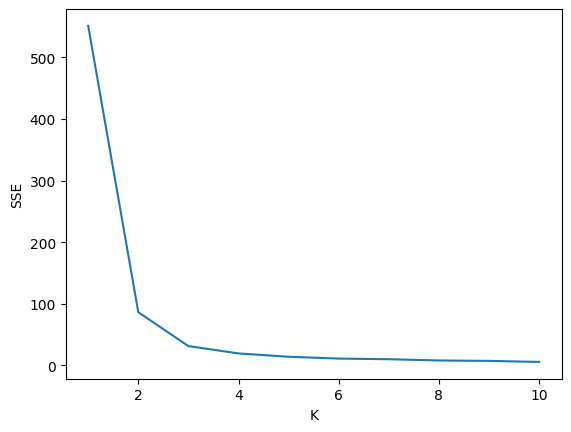

In [27]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng, sse);

Elbow point at 3

In [28]:
km = KMeans(n_clusters=3)
iris_df_1["cluster"] = km.fit_predict(iris_df_1[['petal_length', 'petal_width']])
iris_df_1.head()

,petal_length,petal_width,petal_length_s,petal_width_s,cluster
0,1.4,0.2,0.067797,0.041667,1
1,1.4,0.2,0.067797,0.041667,1
2,1.3,0.2,0.050847,0.041667,1
3,1.5,0.2,0.084746,0.041667,1
4,1.4,0.2,0.067797,0.041667,1


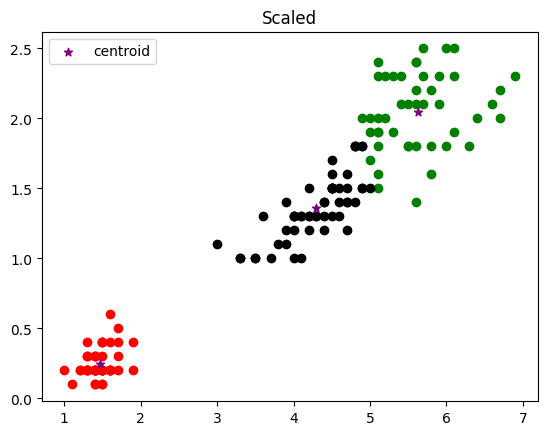

In [29]:
df0 = iris_df_1[iris_df_1.cluster == 0]
df1 = iris_df_1[iris_df_1.cluster == 1]
df2 = iris_df_1[iris_df_1.cluster == 2]

plt.title("Scaled")
plt.scatter(df0.petal_length, df0.petal_width, color="green")
plt.scatter(df1.petal_length, df1.petal_width, color="red")
plt.scatter(df2.petal_length, df2.petal_width, color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

## Scaled

In [30]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1, 11)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df_1[['petal_length_s', 'petal_width_s']])
    sse.append(km.inertia_)

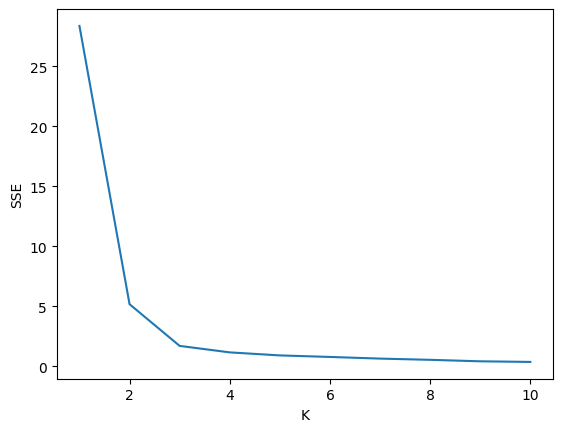

In [31]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng, sse);

In [32]:
km_s = KMeans(n_clusters=3)
iris_df_1["cluster_s"] = km_s.fit_predict(iris_df_1[['petal_length_s', 'petal_width_s']])
iris_df_1.head()

,petal_length,petal_width,petal_length_s,petal_width_s,cluster,cluster_s
0,1.4,0.2,0.067797,0.041667,1,1
1,1.4,0.2,0.067797,0.041667,1,1
2,1.3,0.2,0.050847,0.041667,1,1
3,1.5,0.2,0.084746,0.041667,1,1
4,1.4,0.2,0.067797,0.041667,1,1


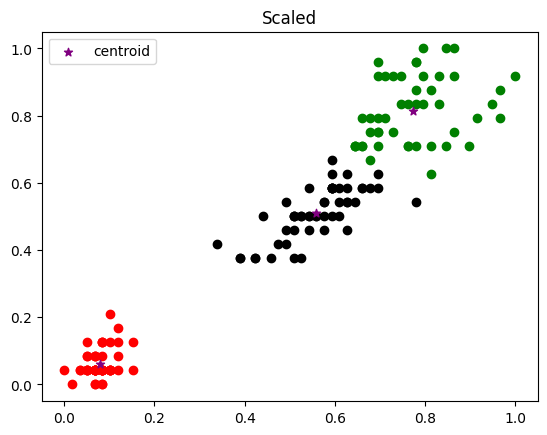

In [33]:
df0 = iris_df_1[iris_df_1.cluster_s == 0]
df1 = iris_df_1[iris_df_1.cluster_s == 1]
df2 = iris_df_1[iris_df_1.cluster_s == 2]

plt.title("Scaled")
plt.scatter(df0.petal_length_s, df0.petal_width_s, color="green")
plt.scatter(df1.petal_length_s, df1.petal_width_s, color="red")
plt.scatter(df2.petal_length_s, df2.petal_width_s, color="black")
plt.scatter(km_s.cluster_centers_[:, 0], km_s.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

As we can see, scaling does not seem to have much effect on this

# With All Fields

In [46]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1, 11)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)

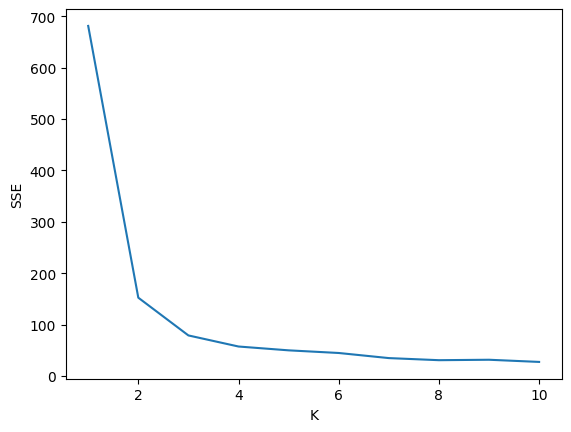

In [48]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng, sse);

In [49]:
km = KMeans(n_clusters=3)
iris_df["cluster"] = km.fit_predict(iris_df)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


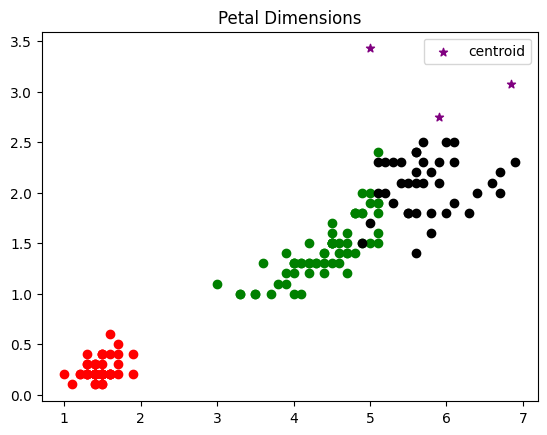

In [50]:
df0 = iris_df[iris_df.cluster == 0]
df1 = iris_df[iris_df.cluster == 1]
df2 = iris_df[iris_df.cluster == 2]

plt.title("Petal Dimensions")
plt.scatter(df0.petal_length, df0.petal_width, color="green")
plt.scatter(df1.petal_length, df1.petal_width, color="red")
plt.scatter(df2.petal_length, df2.petal_width, color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

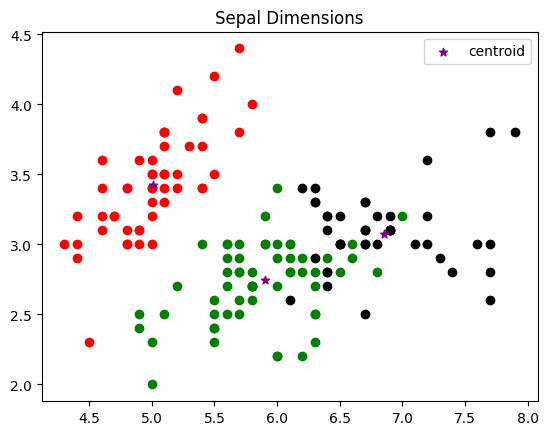

In [51]:
plt.title("Sepal Dimensions")
plt.scatter(df0.sepal_length, df0.sepal_width, color="green")
plt.scatter(df1.sepal_length, df1.sepal_width, color="red")
plt.scatter(df2.sepal_length, df2.sepal_width, color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend();

In [52]:
iris_df['target'] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [53]:
# we can see that there is a numbering difference bw target & cluster columns
# swap 1 and 0 in cluster

swap_map = {1: 0, 0: 1, 2: 2}
iris_df["cluster"] = iris_df["cluster"].map(swap_map).astype(int)

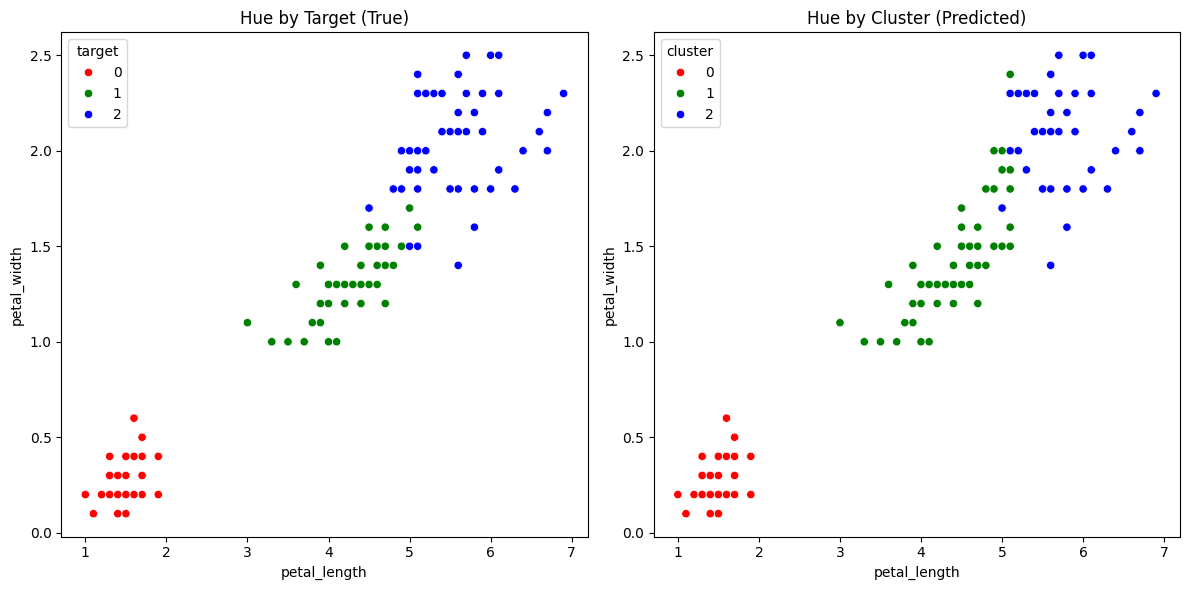

In [54]:
import matplotlib.pyplot as plt
import seaborn as sn

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the RGB color palette
rgb_palette = ["red", "green", "blue"]  # You can customize these colors

# Plot 1: Hue by 'target' with RGB palette
sn.scatterplot(x="petal_length", y="petal_width", hue="target", data=iris_df, ax=axes[0], palette=rgb_palette)
axes[0].set_title("Hue by Target (True)")

# Plot 2: Hue by 'cluster' with RGB palette
sn.scatterplot(x="petal_length", y="petal_width", hue="cluster", data=iris_df, ax=axes[1], palette=rgb_palette)
axes[1].set_title("Hue by Cluster (Predicted)")

plt.tight_layout()
plt.show()

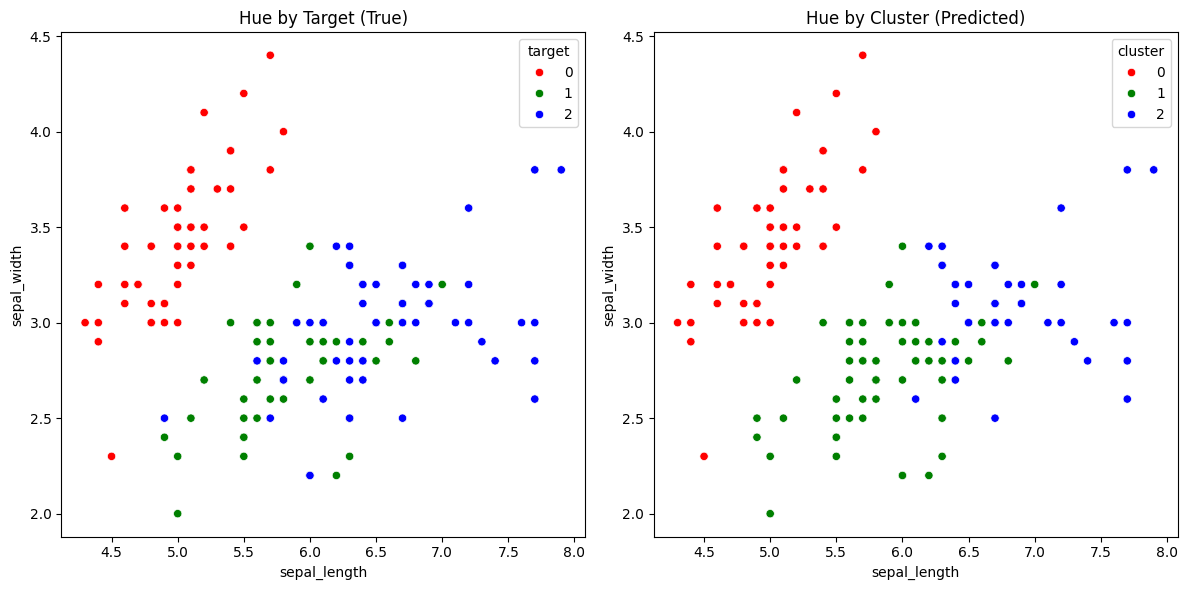

In [55]:
import matplotlib.pyplot as plt
import seaborn as sn

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the RGB color palette
rgb_palette = ["red", "green", "blue"]  # You can customize these colors

# Plot 1: Hue by 'target' with RGB palette
sn.scatterplot(x="sepal_length", y="sepal_width", hue="target", data=iris_df, ax=axes[0], palette=rgb_palette)
axes[0].set_title("Hue by Target (True)")

# Plot 2: Hue by 'cluster' with RGB palette
sn.scatterplot(x="sepal_length", y="sepal_width", hue="cluster", data=iris_df, ax=axes[1], palette=rgb_palette)
axes[1].set_title("Hue by Cluster (Predicted)")

plt.tight_layout()
plt.show()

In [58]:
# let's see how many were predicted correctly, and how many were wrong

iris_df["correct"] = iris_df["target"] == iris_df["cluster"]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,correct
0,5.1,3.5,1.4,0.2,0,0,True
1,4.9,3.0,1.4,0.2,0,0,True
2,4.7,3.2,1.3,0.2,0,0,True
3,4.6,3.1,1.5,0.2,0,0,True
4,5.0,3.6,1.4,0.2,0,0,True


In [59]:
iris_df.groupby("correct").correct.value_counts()

,count
correct,
False,16
True,134
